In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings("ignore")

In [5]:
# load data
iris_sklearn = load_iris()

iris_df = pd.concat([
      pd.DataFrame(iris_sklearn['data'], columns = [iris_sklearn.feature_names[i] for i in range(iris_sklearn.data.shape[1])]),
      pd.DataFrame(iris_sklearn['target'], columns = ['target'])
      ], axis = 1)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# check dataframe's shape

iris_df.shape

(150, 5)

In [7]:
# check data types

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


So, all columns have numeric type.

In [10]:
# check null values

iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

There are no missing values.

In [11]:
# check duplicates 

iris_df.duplicated().sum()

1

There is one duplicated value.

In [17]:
# drop duplicated values

iris_df.drop_duplicates(inplace = True)

In [21]:
# view statistics 

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


- Sepal Length: The average sepal length is approximately 5.84 cm, with a range from 4.3 cm (minimum) to 7.9 cm (maximum).
- Sepal Width: The average sepal width is about 3.06 cm, with values ranging from 2.0 cm to 4.4 cm.
- Petal Length: The average petal length is around 3.75 cm, showing significant variation with a standard deviation of 1.77 cm; the lengths range from 1.0 cm to 6.9 cm.
- Petal Width: The average petal width is approximately 1.19 cm, with values varying from 0.1 cm to 2.5 cm.
- The target variable represents the species classification, with a distribution among three classes (0, 1, and 2), suggesting a balanced classification problem. The mean of the target variable is 0.99, indicating that the dataset contains samples primarily from the two classes.

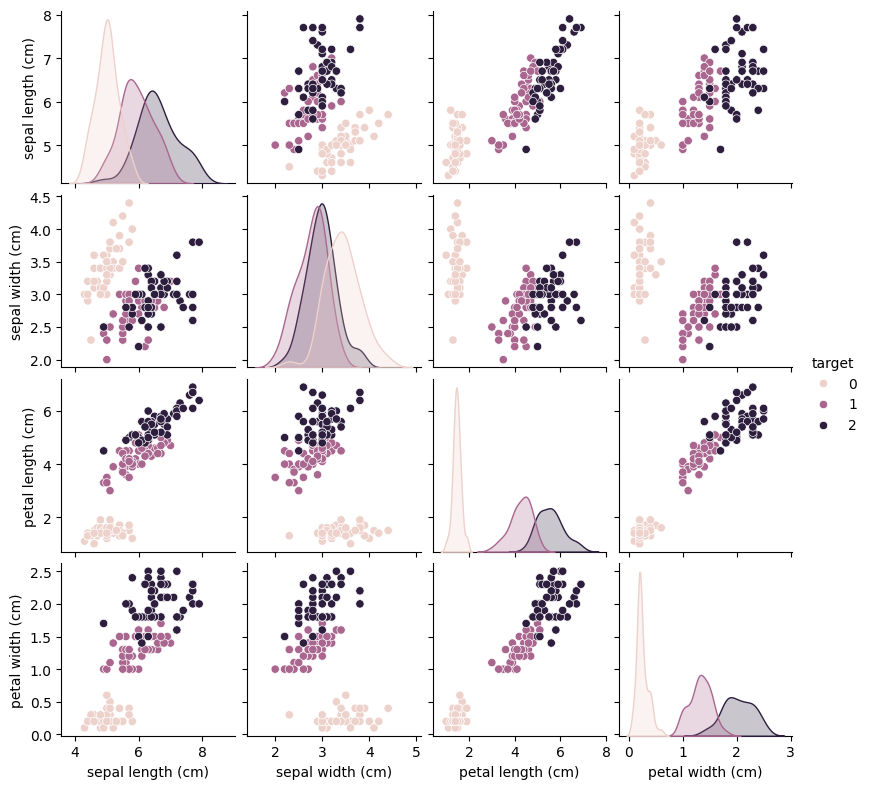

In [35]:
# analyze the relationship between species for all characteristic combinations

sns.pairplot(data = iris_df, hue = "target", size = 2)
plt.show()

- Species 0 is well-separated from the other two species in almost all feature comparisons, particularly in petal length and petal width. This suggests that species 0 has distinctive characteristics compared to the others.
- Petal Length and Petal Width: These two features are highly correlated across the three species, as seen in the strong positive linear trend. This indicates that as petal length increases, petal width tends to increase as well.
- Sepal Length and Sepal Width: There is less clear correlation here, though the points are grouped distinctly by species.
- Sepal Width has the most overlap between species, indicating it might be less helpful for distinguishing between them.
- Petal Length and Petal Width have clear separations between species, with minimal overlap between species 0, 1, and 2.